<a href="https://colab.research.google.com/github/NimishPrakash/IBM-Data-Analyst-Capstone-Project/blob/main/6_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-08-12 19:26:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  33.7MB/s    in 1.0s    

2024-08-12 19:26:22 (33.7 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


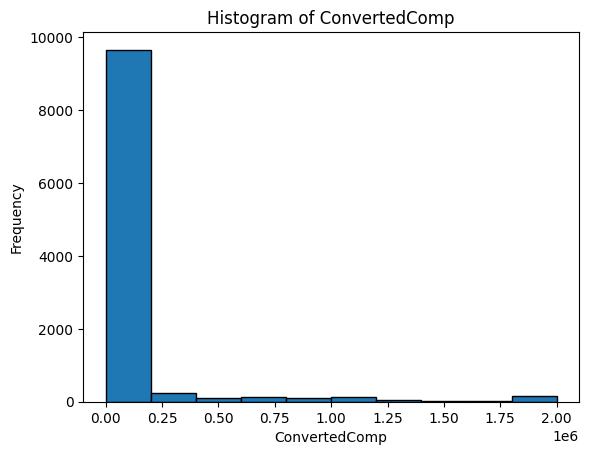

In [8]:
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

plt.hist(df.ConvertedComp,edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()

### Box Plots


Plot a box plot of `Age.`


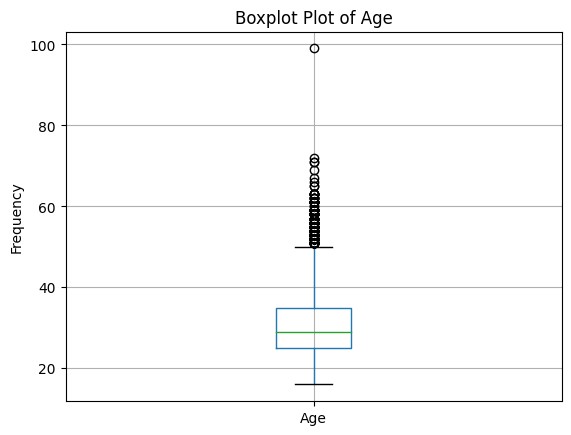

In [9]:
df.boxplot(column='Age')
plt.ylabel('Frequency')
plt.title('Boxplot Plot of Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


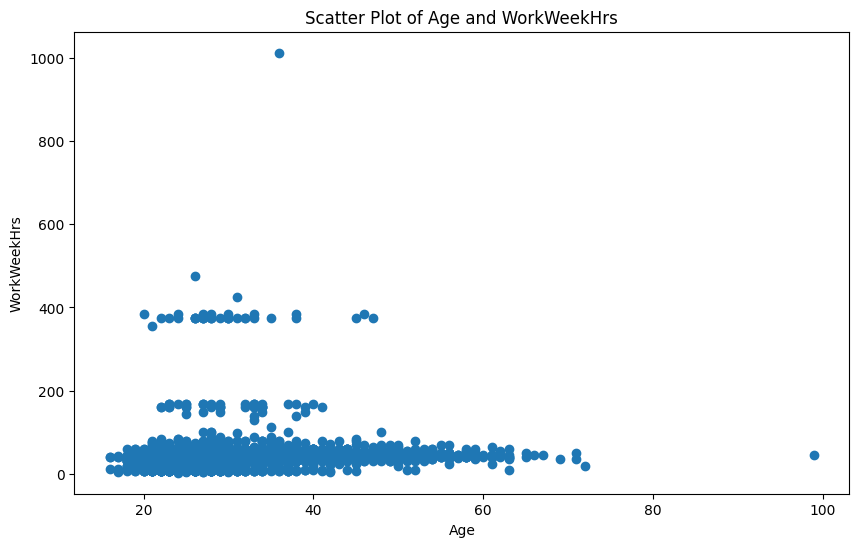

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df.Age,df.WorkWeekHrs)
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.show()

In [11]:
df[['Age','WorkWeekHrs']].corr()

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


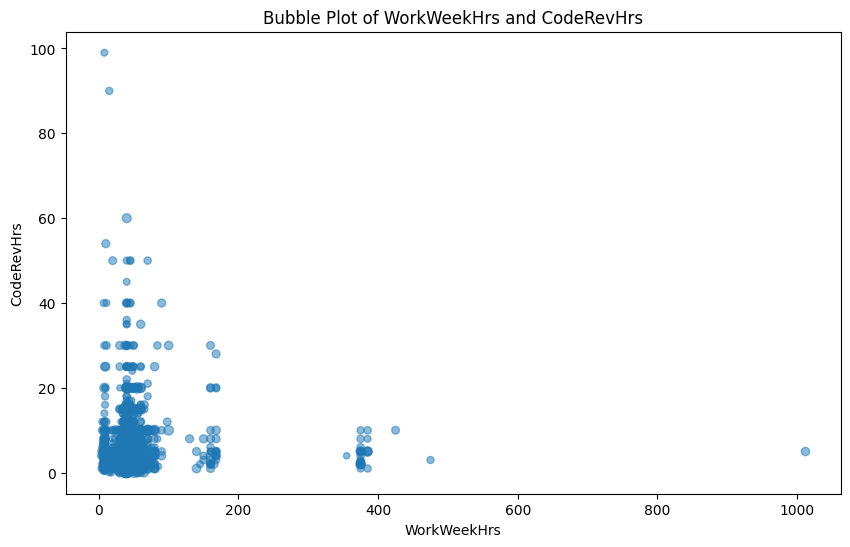

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df.WorkWeekHrs,df.CodeRevHrs,s=df.Age,alpha=0.5)
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [13]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""

df_db = pd.read_sql_query(QUERY,conn)
df_db.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [14]:
df_db['DatabaseDesireNextYear'].value_counts()

,count
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856
Microsoft SQL Server,2706
SQLite,2437
Firebase,1650
MariaDB,1385


Number of respondents who wish to use MySQL Database next year

In [15]:
df_db[df_db['DatabaseDesireNextYear'] == 'MySQL'].shape[0]

3281

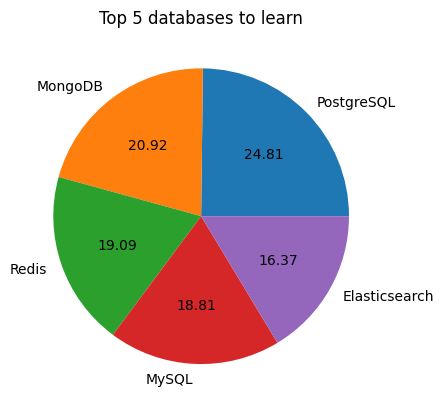

In [16]:
df_count=df_db['DatabaseDesireNextYear'].value_counts().rename_axis('DatabaseName').reset_index(name='Counts')
df_top5=df_count[:5].copy()

plt.pie(df_top5['Counts'],labels=df_top5['DatabaseName'],autopct='%.2f')
plt.title('Top 5 databases to learn')
plt.show()

In [17]:
QUERY = """
SELECT *
FROM DatabaseWorkedWith
"""

df_dbww = pd.read_sql_query(QUERY,conn)
df_dbww.head()

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite


In [18]:
df_dbww['DatabaseWorkedWith'].value_counts()

,count
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016
Redis,2508
Elasticsearch,1954
Oracle,1744
MariaDB,1709


In [19]:
df_dbww[df_dbww['DatabaseWorkedWith'] == 'MySQL'].count()

,0
Respondent,5469
DatabaseWorkedWith,5469


In [20]:
QUERY = """
SELECT *
FROM LanguageWorkedWith
"""

df_langww = pd.read_sql_query(QUERY,conn)
df_langww.head()

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL


In [21]:
df_langww['LanguageWorkedWith'].value_counts()

,count
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542
Java,4506
C#,4288
TypeScript,3232
PHP,2913


In [22]:
df_langww[df_langww['LanguageWorkedWith'] == 'SQL'].count()

,0
Respondent,7106
LanguageWorkedWith,7106


In [23]:
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""

df_lang = pd.read_sql_query(QUERY,conn)
df_lang

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell
...,...,...
55759,25142,Bash/Shell/PowerShell
55760,25142,C
55761,25142,C++
55762,25142,Python


In [24]:
df_lang['LanguageDesireNextYear'].value_counts()

,count
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088
C#,3591
Bash/Shell/PowerShell,3097
Java,2953
Go,2759


Python is the third most popular language respondents wish to learn next year

In [25]:
QUERY = """
select count(DevType) as Count,DevType
from DevType
group by DevType
order by count(DevType) DESC
"""

df3=pd.read_sql_query(QUERY,conn)
df3

,Count,DevType
0,6928,"Developer, full-stack"
1,6290,"Developer, back-end"
2,3920,"Developer, front-end"
3,2575,"Developer, desktop or enterprise applications"
4,1959,"Developer, mobile"
5,1639,DevOps specialist
6,1413,Database administrator
7,1202,System administrator
8,988,Designer
9,911,"Developer, QA or test"


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [26]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df_wk = pd.read_sql_query(QUERY,conn)

df_g=df_wk.groupby('Age').median()
df_g

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


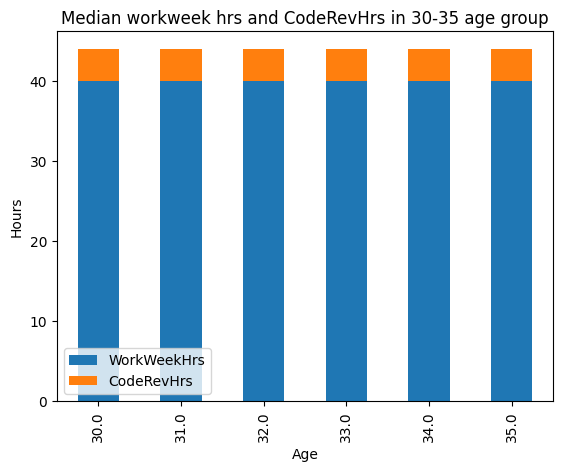

In [27]:
df_g.plot(kind='bar',stacked=True)
plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('Median workweek hrs and CodeRevHrs in 30-35 age group')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [28]:
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df_ac = pd.read_sql_query(QUERY,conn)

df_gr=df_ac.groupby('Age').median()
df_gr.head()

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0


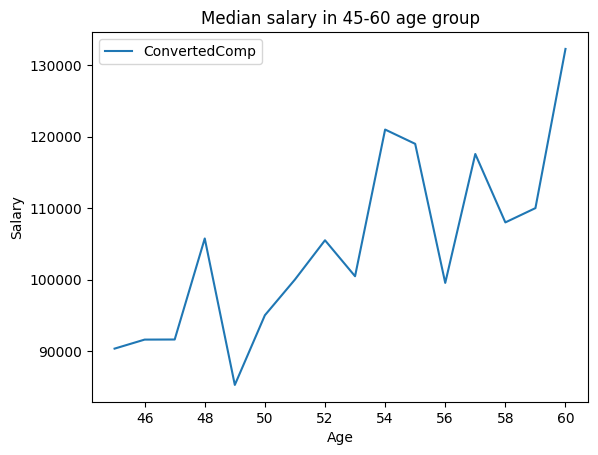

In [29]:
df_gr.plot(kind='line')
plt.title('Median salary in 45-60 age group')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [30]:
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30
"""
df_ac1 = pd.read_sql_query(QUERY,conn)

df_gr1=df_ac1.groupby('Age').median()

<Axes: xlabel='Age'>

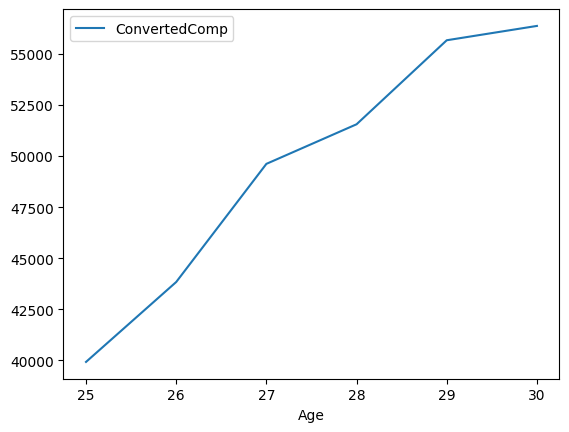

In [31]:
df_gr1.plot(kind='line')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [32]:
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
from master
group by MainBranch
"""

df=pd.read_sql_query(QUERY,conn)
df.head()

,MainBranch,MainBranch
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


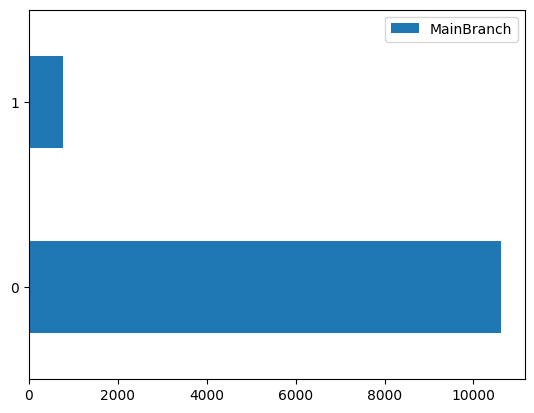

In [33]:
df.plot(kind='barh')
plt.show()

Close the database connection.


In [34]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
